Для виконання завдання лабораторної роботи з бінарної класифікації на основі набору даних Cars vs Flowers, ви можете слідувати таким крокам:

Крок 1: Створення набору даних
Тема набору даних:
Тема: Класифікація зображень автомобілів та квітів.
Завантажте набір даних Cars vs Flowers з Kaggle: Cars vs Flowers Dataset.
Набір містить зображення двох категорій: "cars" і "flowers".
Попередня обробка даних:
Перевірте набір даних, виберіть 100 зображень для тренування та 20 зображень для тестування.
Переконайтесь, що зображення нормалізовані, а також ви обробили відсутні дані (якщо такі є).
Крок 2: Реалізація моделі CNN
Імпортування необхідних бібліотек:

In [4]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

Завантаження та підготовка набору даних:
python
Копіювати код


In [5]:
# Шляхи до директорій з даними
train_dir = r"C:\Users\Andrew\Downloads\dataset\cars_vs_flowers\training_set"  # Заміни на правильний шлях
test_dir = r"C:\Users\Andrew\Downloads\dataset\cars_vs_flowers\test_set"    # Заміни на правильний шлях

# Завантаження тренувальних та тестових даних
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='int',
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(180, 180),
    batch_size=32
)


Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


Створення архітектури CNN:

In [12]:
# Створення моделі CNN
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),  # Масштабування пікселів
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Для бінарної класифікації
])

# Компіляція моделі
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Для бінарної класифікації
    metrics=['accuracy']
)


c:\work prog\3 курс 1 семестр\Аналіз данних\data-science\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Крок 3: Тренування та тестування моделі
Тренування моделі:

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 544ms/step - accuracy: 0.5546 - loss: 0.9183 - val_accuracy: 0.7430 - val_loss: 0.5721
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 461ms/step - accuracy: 0.7504 - loss: 0.5192 - val_accuracy: 0.7830 - val_loss: 0.4912
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 469ms/step - accuracy: 0.8212 - loss: 0.4142 - val_accuracy: 0.8225 - val_loss: 0.4101
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 474ms/step - accuracy: 0.8418 - loss: 0.3641 - val_accuracy: 0.8140 - val_loss: 0.4160
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 457ms/step - accuracy: 0.8710 - loss: 0.2806 - val_accuracy: 0.7995 - val_loss: 0.4483
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 487ms/step - accuracy: 0.9157 - loss: 0.2070 - val_accuracy: 0.8115 - val_loss: 0.5336
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 486ms/step - accuracy: 0.9296 - loss: 0.1619 - val_accuracy: 0.8000 - val_loss: 0.5806
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 484ms/step - accuracy: 0.9616 - loss: 0.1165 - val_accu

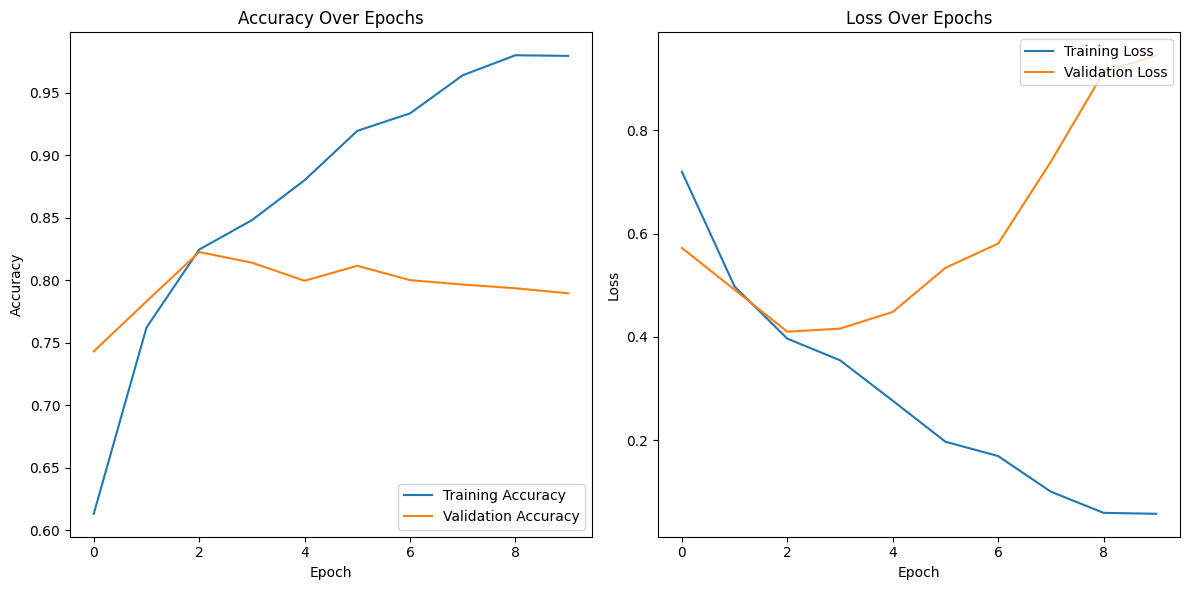

In [7]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy*100:.2f}%')
plt.figure(figsize=(12, 6))

# Графік точності
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Графік втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Крок 4: Оцінка результатів
Оцінка за допомогою метрик:
Оцінка точності, F1-міри, точності та відгуку.

In [8]:
from sklearn.metrics import classification_report

# Оцінка результатів
y_true = []
y_pred = []

for images, labels in test_dataset:
    y_true.extend(labels.numpy())
    y_pred.extend(np.round(model.predict(images)).flatten())

print(classification_report(y_true, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Пояснення:
Завантаження тестових даних: Ви отримуєте зображення та відповідні мітки (1 чи 0) з тестового набору даних.
Передбачення: Використовуємо модель для передбачення ймовірності належності до кожного класу (автомобіль чи квітка).
Порівняння передбачення і істини: Для кожного зображення визначаємо, чи модель передбачила "Car" (якщо значення передбачення менше за 0.5) або "Flower" (якщо більше за 0.5).
Виведення результатів: Виводяться зображення разом з підписами, де вказано передбачене значення і фактичний клас.
Цей код дозволяє вам візуалізувати перші кілька зображень, порівнюючи передбачення моделі з реальними етикетками.

Shape of first image: (180, 180, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


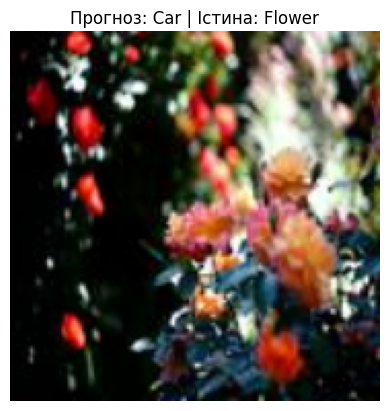

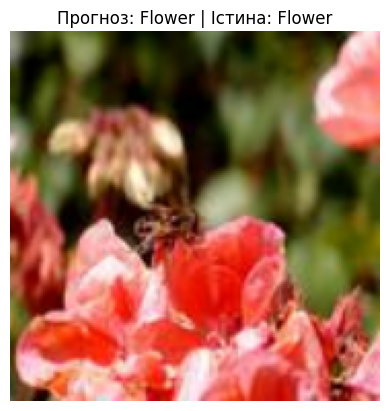

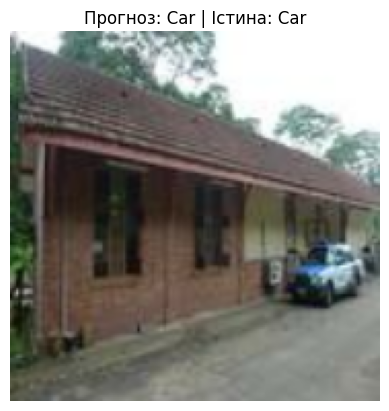

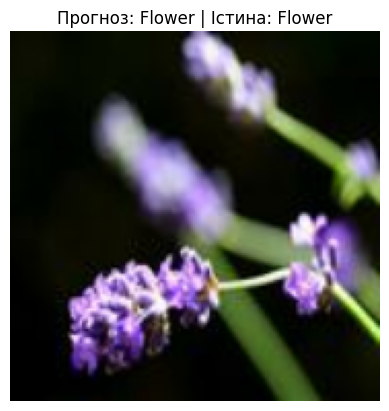

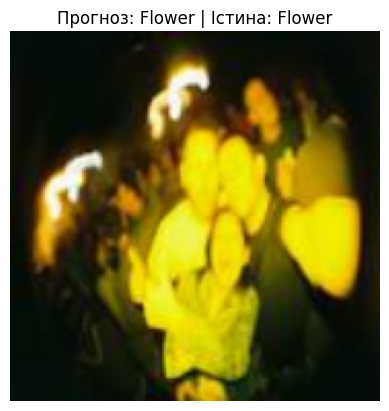

In [11]:
import matplotlib.pyplot as plt

# Створюємо ітератор для test_dataset
test_iterator = iter(test_dataset)

# Отримуємо одну партію з тестових даних
images, labels = next(test_iterator)

# Перевіримо, чи всі зображення мають правильну розмірність
print(f"Shape of first image: {images[0].shape}")

# Виконуємо передбачення
predictions = model.predict(images)

# Виводимо перші 5 зображень з підписами
for i in range(5):
    plt.imshow(images[i].numpy().astype("uint8"))  # Конвертуємо з тензора в uint8
    plt.axis("off")

    # Якщо передбачення < 0.5, це "Car", якщо > 0.5, то "Flower"
    pred_label = "Car" if predictions[i] < 0.5 else "Flower"
    
    # Фактична категорія
    true_label = "Car" if labels[i] == 0 else "Flower"

    # Виводимо зображення з підписом
    plt.title(f"Прогноз: {pred_label} | Істина: {true_label}")
    plt.show()
